In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [14]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

transform = transforms.ToTensor()

dataset = datasets.MNIST("~/.pytorch/MNIST_data/", download=True, train=False, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=dataset,
                                          batch_size=64,
                                          shuffle=True)



In [25]:
class Autoencoder(nn.Module):
    def __init__(self, layer_sizes):
        super(Autoencoder, self).__init__()
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes) - 1
        
        encoder_layers = []
        for i in range(self.num_layers):
            encoder_layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
            encoder_layers.append(nn.ReLU())
        self.encoder = nn.Sequential(*encoder_layers)
        
        decoder_layers = []
        for i in range(self.num_layers, 0, -1):
            decoder_layers.append(nn.Linear(layer_sizes[i], layer_sizes[i-1]))
            if i != 1:
                decoder_layers.append(nn.ReLU())
        self.decoder = nn.Sequential(*decoder_layers)


    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [26]:
layer_sizes = [784, 256, 128, 64]   
model = Autoencoder(layer_sizes)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-3, 
                             weight_decay=1e-5)


In [27]:
num_epochs = 30
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        img = img.reshape(-1, 28*28) 
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))


Epoch:1, Loss:0.0371
Epoch:2, Loss:0.0300
Epoch:3, Loss:0.0266
Epoch:4, Loss:0.0241
Epoch:5, Loss:0.0241
Epoch:6, Loss:0.0268
Epoch:7, Loss:0.0226
Epoch:8, Loss:0.0190
Epoch:9, Loss:0.0211
Epoch:10, Loss:0.0191
Epoch:11, Loss:0.0186
Epoch:12, Loss:0.0185
Epoch:13, Loss:0.0159
Epoch:14, Loss:0.0185
Epoch:15, Loss:0.0204
Epoch:16, Loss:0.0163
Epoch:17, Loss:0.0140
Epoch:18, Loss:0.0175
Epoch:19, Loss:0.0158
Epoch:20, Loss:0.0154
Epoch:21, Loss:0.0114
Epoch:22, Loss:0.0132
Epoch:23, Loss:0.0146
Epoch:24, Loss:0.0185
Epoch:25, Loss:0.0144
Epoch:26, Loss:0.0135
Epoch:27, Loss:0.0138
Epoch:28, Loss:0.0156
Epoch:29, Loss:0.0149
Epoch:30, Loss:0.0132


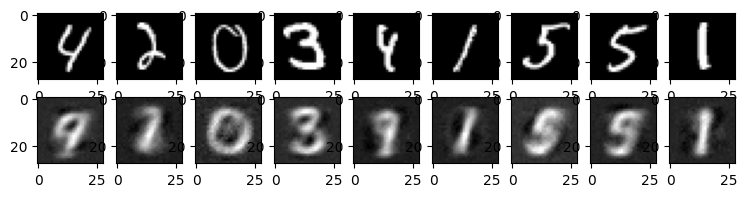

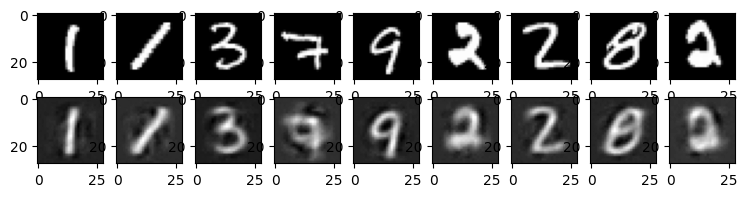

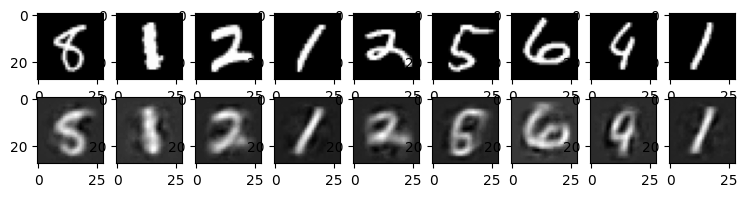

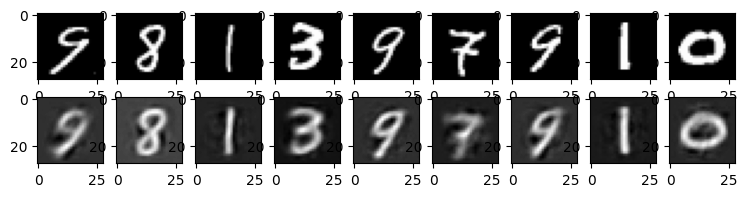

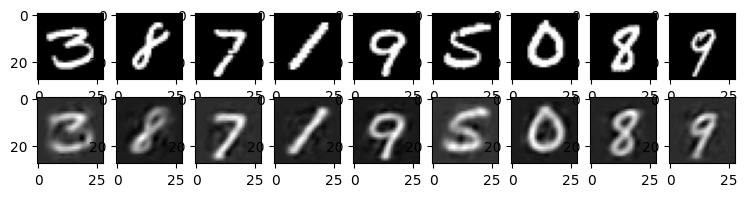

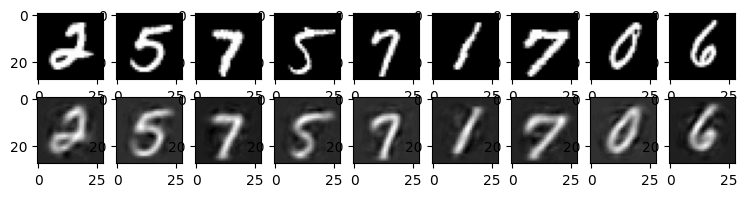

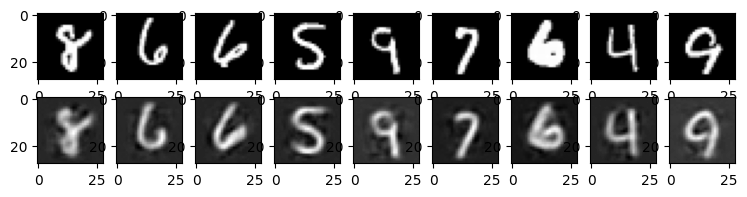

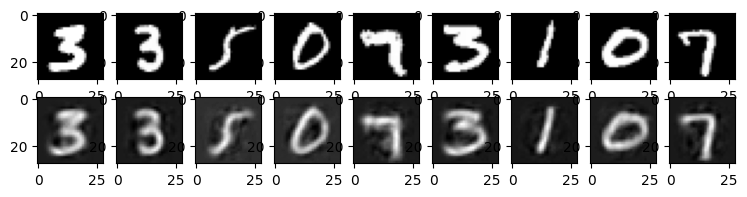

In [28]:
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28,28) 
        # item: 1, 28, 28
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        item = item.reshape(-1, 28,28) 
        # item: 1, 28, 28
        plt.imshow(item[0])
